<center><h1>INF-552 Lab 0</h1></center>
<br>
<center><font size="4">Introduction to Basic Development Tools</font></center>

### Rules

1. Please read the instructions and problem prompts **carefully**.
2. This lab is to give you some basic APIs of numpy, pandas and scikit-learn. Besides, some topics such as how to make your jupyter notebook be a more efficient developing tools, how to use git and GitHub will also be covered. The lab is to be done individually. You may talk to your fellow classmates about general issues ("Remind me again: Which API should I used for doing group by operation to a data set") but about the specifies of how to do these exercises.
3. Along with a similar vein, you can ask the TA for help, but ask questions about **concepts** but not ask the TA to help you debug your code. The TA is here to help, but not to do the work for you.
4. You are welcome to use the class resources and the Internet.
5. Playing with variations. Solve one problems, and then copy the code to a new cell and play around with it. Doing this is the single most important thing when learning programming.
6. This lab will not be graded but the content is highly related to your future programming assignments. So, treat it wisely.
7. All the content having been gone though in the week 1 discussion is just a snapshot of the most basic concepts. **You need to keep study more about Git, GitHub, Pandas, Numpy and Scikit-Learn in order to finish your programming assignments successfully.**
8. Have fun!

### Setup Development Environment

There are many ways to setup the environment. But, I do recommend a simple idea that is using the Anaconda, which is a pre-build python environment with bundles of useful packages.

**To download the Anaconda, go to the following website:
https://www.anaconda.com/distribution/**. Download the correct version based on your operating system and install it step by step.

Then, **configure your PATH environment variable** to make the conda command work. The following command is an easy way to test whether your configuration is correct. If it is, you will see something as like as the sample output.

> **command:**
>
> conda --version
>
> **sample output:**
>
> conda 4.6.12

**Finally, download this jupyter notebook file,** then change the working directory to where its location in terminal, and type the following command to open the jupter notebook and finish the lab.

> **command:** 
> jupyter notebook

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

### Pandas

#### The read_csv() Method

First, read the documentation about the *read_csv()* method in Pandas (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Then, try to read data from file Salaries.csv to a dataframe, make the column playerID in the csv file as the index column and the first row as the header. Also, skip the second row when reading the file.

In [51]:
df = pd.read_csv("Salaries.csv", index_col=3, header=0, skiprows = [1])
print(df)

           yearID teamID lgID    salary
playerID                               
bedrost01    1985    ATL   NL    550000
benedbr01    1985    ATL   NL    545000
campri01     1985    ATL   NL    633333
ceronri01    1985    ATL   NL    625000
chambch01    1985    ATL   NL    800000
...           ...    ...  ...       ...
treinbl01    2015    WAS   NL    512800
ugglada01    2015    WAS   NL    507500
werthja01    2015    WAS   NL  21000000
zimmejo02    2015    WAS   NL  16500000
zimmery01    2015    WAS   NL  14000000

[25574 rows x 4 columns]


#### Indexing and Selecting Data

Select the id of the players who are registered in ATL and HOU and whose salary is higher than one million.

In [52]:
filtered = df[(df["teamID"].isin(["ATL", "HOU"]))&(df["salary"] > 1e6)]
print(filtered)

           yearID teamID lgID   salary
playerID                              
hornebo01    1985    ATL   NL  1500000
murphda05    1985    ATL   NL  1625000
suttebr01    1985    ATL   NL  1354167
ryanno01     1985    HOU   NL  1350000
hornebo01    1986    ATL   NL  1800000
...           ...    ...  ...      ...
quallch01    2015    HOU   AL  3000000
rasmuco01    2015    HOU   AL  8000000
singljo02    2015    HOU   AL  2000000
sippto01     2015    HOU   AL  2400000
valbulu01    2015    HOU   AL  4200000

[595 rows x 4 columns]


#### The describe() Method

Calculate the standard Deviation, first quartile, medium, third quartile, mean, maximum, minimum of the salary in team ATL.

In [53]:
df["salary"].describe()

count    2.557400e+04
mean     2.008608e+06
std      3.315763e+06
min      0.000000e+00
25%      2.750000e+05
50%      5.500000e+05
75%      2.250000e+06
max      3.300000e+07
Name: salary, dtype: float64

#### The iterrows() Method

Create a Python dictionary object whose keys are the headers of the dataframe created in the read_csv() exercise and values are Python list objects that contain data corresponding to the headers. (Here, use the iterrows method to iterate each row of the dataframe and copy it to a dictionary. However, there is a easier way. Learn how the to_dict() method works by yourself later)

In [54]:
d = {}
for key in df.columns.values:
    d[key] = []

for _, data in df.iterrows():
    for header in data.index.values:
        d[header].append(data[header])

#### Create Dataframe Using the Constructor

Read the documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame and create a dataframe using pd.DataFrame from the dictionary created in the iterrows() exercise. Change the header to "a", "b", "c", ... at creation time.

In [55]:
df = pd.DataFrame.from_dict(data=d, orient='columns')
df.columns=['a', 'b', 'c', 'd']
df

,a,b,c,d
0,1985,ATL,NL,550000
1,1985,ATL,NL,545000
2,1985,ATL,NL,633333
3,1985,ATL,NL,625000
4,1985,ATL,NL,800000
...,...,...,...,...
25569,2015,WAS,NL,512800
25570,2015,WAS,NL,507500
25571,2015,WAS,NL,21000000
25572,2015,WAS,NL,16500000


### Numpy

Quick start: https://www.numpy.org/devdocs/user/quickstart.html

Numpy axes explaination: https://www.sharpsightlabs.com/blog/numpy-axes-explained/

#### The np.array Method

Example 1:

```python
ls = [1, 2, 3]
arr = np.array(ls)
```

Example 2:
```python
>>> np.array([[1, 2], [3, 4]])
array([[1, 2],
       [3, 4]])
```

Now, create a 2-dimensional Python list object, then convert it to a Numpy array object.

In [56]:
c = np.array([[1, 2], [3, 4]])
c

array([[1, 2],
       [3, 4]])

#### ndarray Objects' Attributes

Play with the **ndim, shape, size, dtype, itemsize and data** attribute.

Example:

```python
>>> arr = np.array([[1, 2], [3, 4]])
>>> arr.ndim
2
```

In [57]:
print(c.ndim)
print(c.shape)
print(c.size)



2
(2, 2)
4


#### Dimension of ndarray Ojects

Play with the reshape() and flatten() method.

Example:
```python
>>> arr = np.array([[1, 2], [3, 4]])
>>> arr.flatten()
array([1, 2, 3, 4])
```

In [58]:
print(c.flatten())
newarr = c.reshape(-1)
print(newarr)

[1 2 3 4]
[1 2 3 4]


#### The Slice Operation of ndarray Objects

Understand how the slice operation works for 1-D array and 2-D array.

Example:

```python
>>> arr = np.array([[1, 2, 3], [3, 4, 6], [7, 8, 9]])
>>> arr[1:]
array([[3, 4, 6],
       [7, 8, 9]])
>>> arr[1:, 0:2]
array([[3, 4],
       [7, 8]])
```

In [59]:
print(c[1:])

[[3 4]]


#### The Calculation of ndarray Objects

Play with the **argmin(), argmax(), min(), max(), mean(), sum(), std(), dot(), square(), sqrt(), abs(). exp(), sign(), mod()** method.

Example:

```python
>>> np.square(array)
array([[ 1,  4,  9],
       [ 9, 16, 36],
       [49, 64, 81]])

```

In [60]:
# arr = np.argmax(c)
# arr
np.argmax(c)

3

#### Other Important Methods Inside Module Numpy

Play with the arange(), ones(), zeros(), eye(), linspace(), concatenate() method.

Example:

```python
>>> np.eye(3)
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])
```

In [61]:
np.eye(1)

array([[1.]])

### Scikit-Learn

The followings are packages (or methods) in Python (Scikit-Learn and Scipy) that will be frequently used in your programming assignment. So, please read carefully.

- Data Preprocessing (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)
    - Standardization: StandardScaler
    - Normalization: MinMaxScaler
    - Quantifing Categorical Features: LabelEncoder. OneHotEncoder
    - Construct Train and Test Set: model_selection.train_test_split
- KNN: KNeighborsClassifier
- Linear Regression: LinearRegression
- Logistic Regression: LogisticRegression, LogisticRegressionCV
- Feature Selection / Model Selection
    - L1 Penalized Regression (Lasso Regression) with Cross-Validation: LassoCV
    - L2 Penalized Regression (Ridge Regression) with Cross-Validation: RidgeCV
    - Cross-Validation: StratifiedKFold, RepeatedKFold, LeaveOneOut, KFold, model_selection.cross_validate, model_selection.cross_val_predict, model_selection.cross_val_score
    - Model Metrics (https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics): accuracy_score, auc, f1_score, hamming_loss, precision_score, recall_score, roc_auc_score
- Decision Tree: DecisionTreeClassifier, DecisionTreeRegressor
- Bootstrap, Ensemble Methods
    - Bootstrap: bootstrapped (https://pypi.org/project/bootstrapped/)
    - Bagging: RandomForestClassifier, RandomForestRegressor
    - Boosting: AdaBoostClassifier, AdaBoostRegressor
- Support Vector Machines (https://scikit-learn.org/stable/modules/svm.html#svm): LinearSVC, LinearSVR
- Multiclass and Multilabel Classification (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.multiclass)
    - One-vs-one Multiclass Strategy: OneVsOneClassifier
    - One-vs-the-rest (OvR) multiclass/multilabel strategy / OneVsRestClassifier
- Unsupervised Learning
    - K-means Clustering: KMeans
    - Hierarchical Clustering: scipy.cluster.hierarchy (not scikit-learn)
- Semisupervised Learning (https://scikit-learn.org/stable/modules/label_propagation.html)

### Matplotlib

**Quick start:** https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html

**Exercises:**

(a) Create two one dimensional arrays x and y and plot y vs x, add title, xlabel, ylabel, grid.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])
```

copy the code above to the following cell and add code for plotting the parabola.

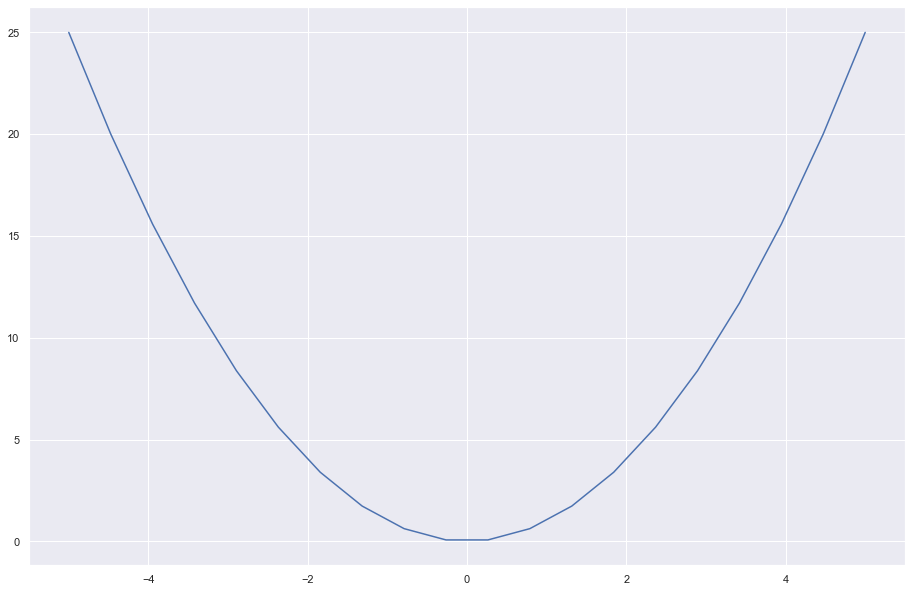

In [62]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])
plt.plot(x,y)


What happens if the independent variable is not sorted before plotting? Try plotting directly using the following defined array.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
np.random.shuffle(x)
y = np.array([j ** 2 for j in x])
```

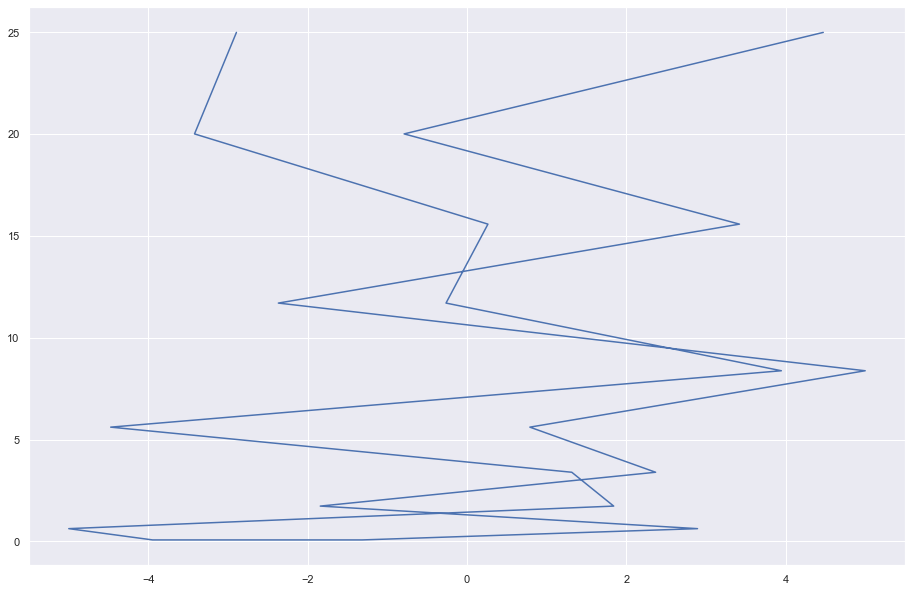

In [63]:
np.random.shuffle(x)
plt.plot(x,y)

(b) Create multiple arrays and plot them with different styles, add legends, add text/mathematical equations on the plot.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])
```

copy the code above to the following cell and add code for plotting curve $\left(x, y1\right)$, $\left(x, y2\right)$ and $\left(x, y3\right)$.

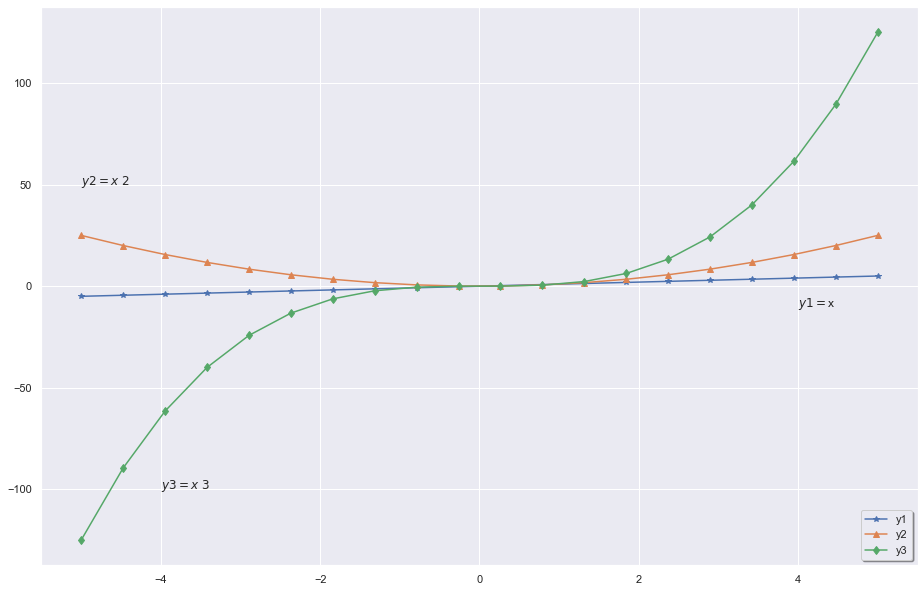

In [64]:
x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])

plt.plot(x,y1,'-*')
plt.plot(x,y2,'-^')
plt.plot(x,y3,'-d')

plt.text(4,-10,'$y1=$x')
plt.text(-5, 50, "$y2 = x ^ 2$")
plt.text(-4, -100, "$y3 = x ^ 3$")

plt.legend(["y1", "y2", "y3"], loc="lower right", shadow=True)


(c) Create multiple arrays and plot them into one figure **(No multiple figure and no subplot is allowed in this question)**.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])
```

copy the code above to the following cell and add code for plotting curve $\left(x, y1\right)$, $\left(x, y2\right)$ and $\left(x, y3\right)$.

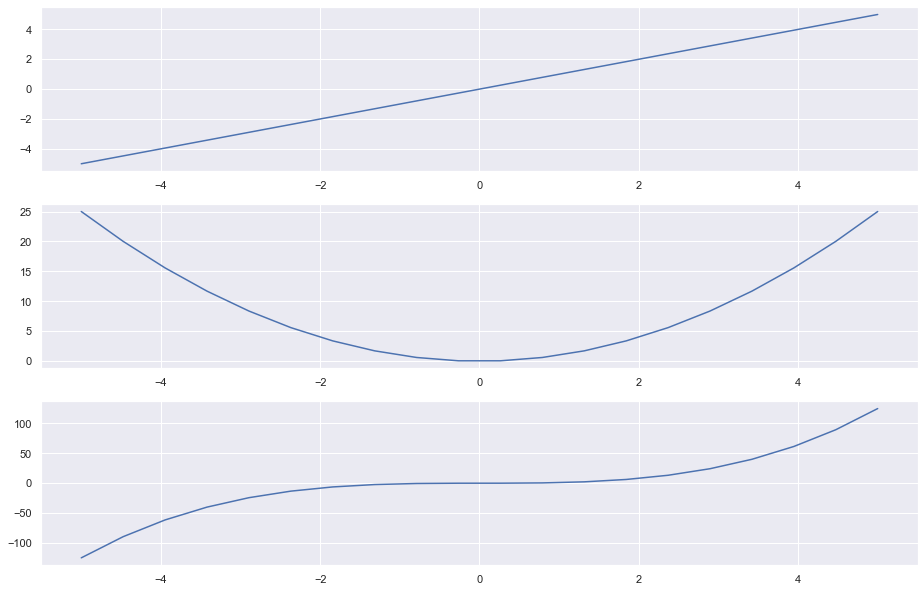

In [65]:
x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])

fig = plt.figure()

figure = plt.subplot(311)
figure2 = plt.subplot(312)
ax3 = plt.subplot(313)

figure.plot(x, y1)
figure2.plot(x, y2)
ax3.plot(x, y3)

plt.show()


(d) Create multiple subplots, play around with the figure size, figure title, and its font style and font size **(One curve is plotted in one subplot in this question)**.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])
```

copy the code above to the following cell and add code for plotting curve $\left(x, y1\right)$, $\left(x, y2\right)$ and $\left(x, y3\right)$.

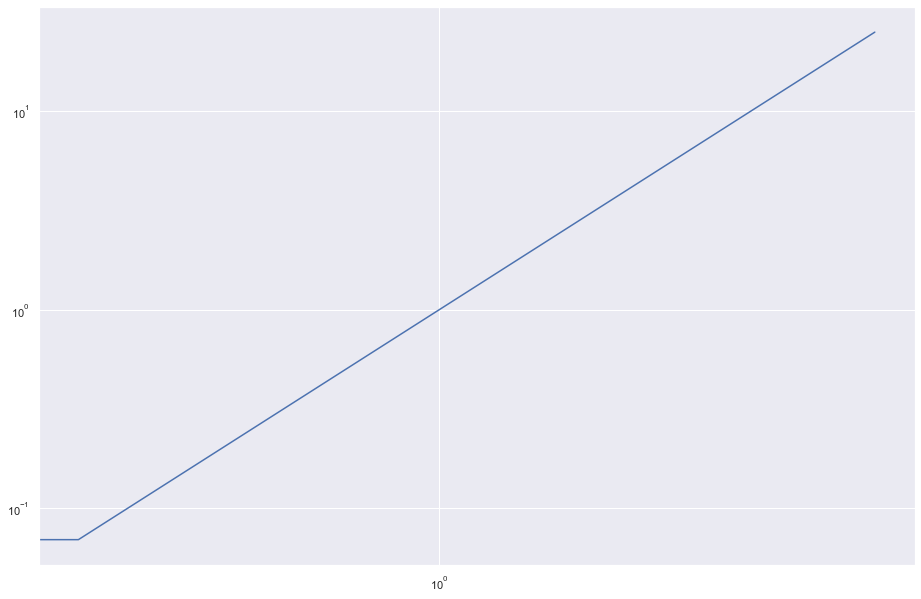

In [66]:
x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])

plt.loglog(x, y)

plt.show()

(e) Change the limits on x and y axes, **use logarithmic axes to plot**.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])
```

copy the code above to the following cell and add code for plotting the parabola.

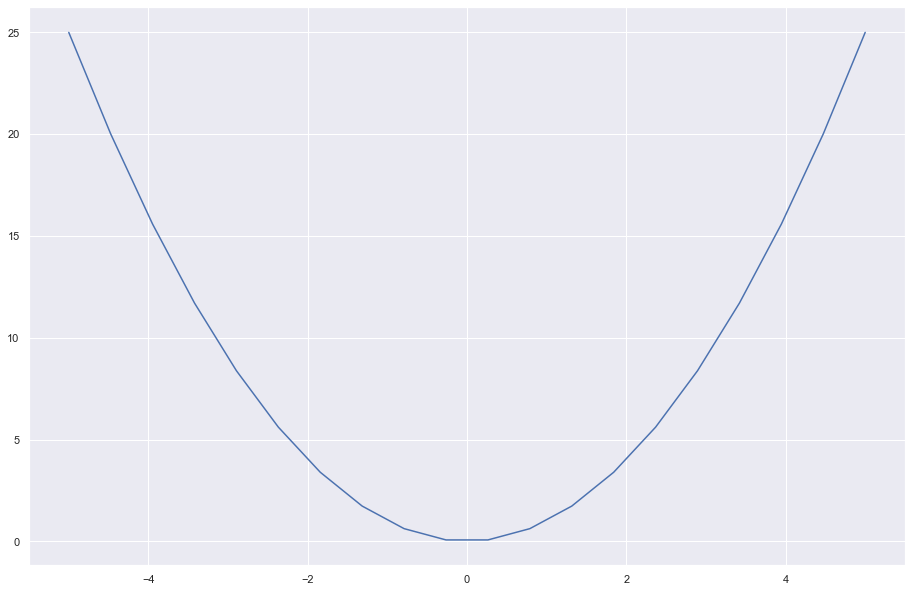

In [67]:
x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])

plt.plot(x, y)

plt.show()

### Pandas's DataFrame.plot and Seaborn

#### Pandas's DataFrame.plot

Use the Salaries.csv again (You can use the dataframe object loaded from section 3.1).

(a) For team 'ATL', plot a scatter plot between feature yearID and salary.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='yearID', ylabel='salary'>

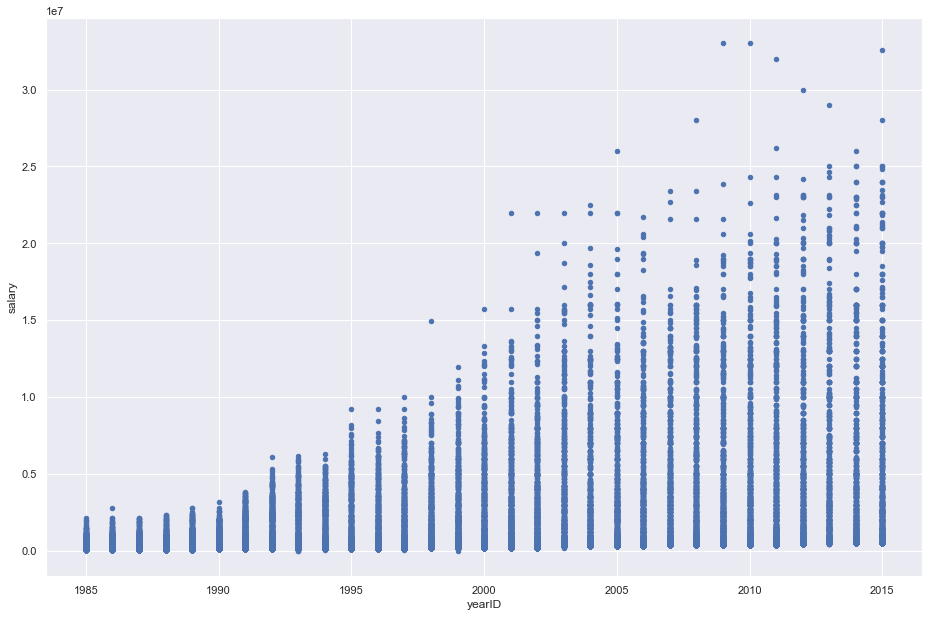

In [68]:
df  = pd.read_csv("Salaries.csv")
df.plot(kind='scatter',x='yearID',y='salary')

(b) For year 1985, plot a bar chart to show the average salary for each team.

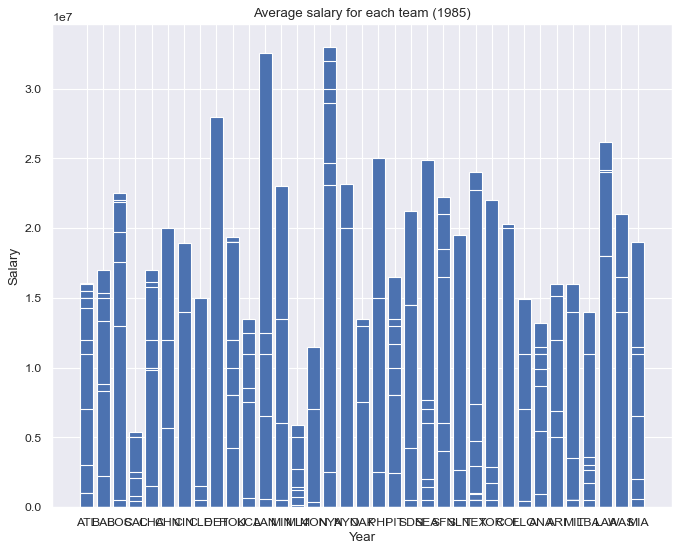

In [76]:
yr_df = df.loc[df['yearID'] == 1985]
plt.figure(figsize=(10, 8), dpi=80)
plt.title("Average salary for each team (1985)")
plt.bar(df['teamID'], df['salary'])
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()

(c) For team 'ATL', plot a line chart to show how the annual average salary change by years.

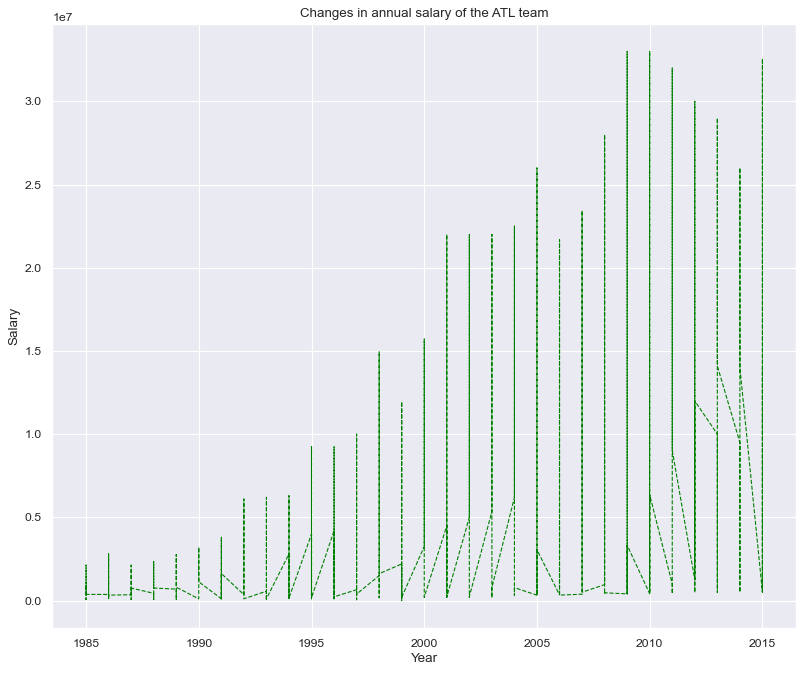

In [70]:
plt.figure(figsize=(12, 10), dpi=80)
plt.title("Changes in annual salary of the ATL team")
plt.plot(df['yearID'], df['salary'], color='green',   
         linewidth=1.0,  
         linestyle='--')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()

#### Seaborn

(a) Append one more numeric feature to the data frame (can be generated randomly), then for team 'ATL', use the seaborn.pairplot to plot scatter plots among all numeric features in the data frame for team. 

In [71]:
df  = pd.read_csv("Salaries.csv")
df['randCol'] = np.random.randint(1, 6, df.shape[0])
df

,yearID,teamID,lgID,playerID,salary,randCol
0,1985,ATL,NL,barkele01,870000,4
1,1985,ATL,NL,bedrost01,550000,1
2,1985,ATL,NL,benedbr01,545000,5
3,1985,ATL,NL,campri01,633333,2
4,1985,ATL,NL,ceronri01,625000,3
...,...,...,...,...,...,...
25570,2015,WAS,NL,treinbl01,512800,1
25571,2015,WAS,NL,ugglada01,507500,5
25572,2015,WAS,NL,werthja01,21000000,2
25573,2015,WAS,NL,zimmejo02,16500000,2


(b) For year 1985 and for each team, plot a boxplot to show how the salary distribute within a team.

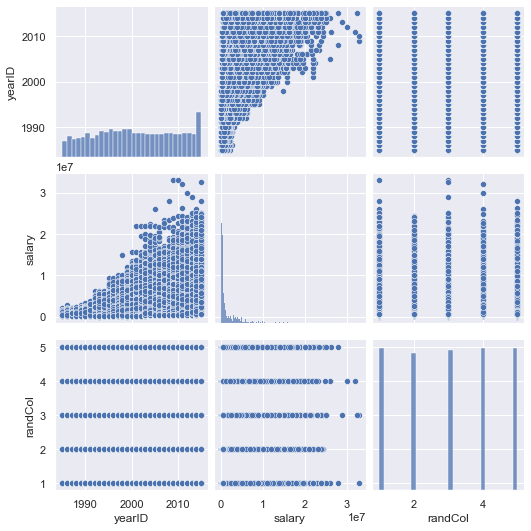

In [72]:
sns.set(rc={'figure.figsize':(15.7,10.27)})
sns.pairplot( data =df)

<AxesSubplot:xlabel='teamID', ylabel='salary'>

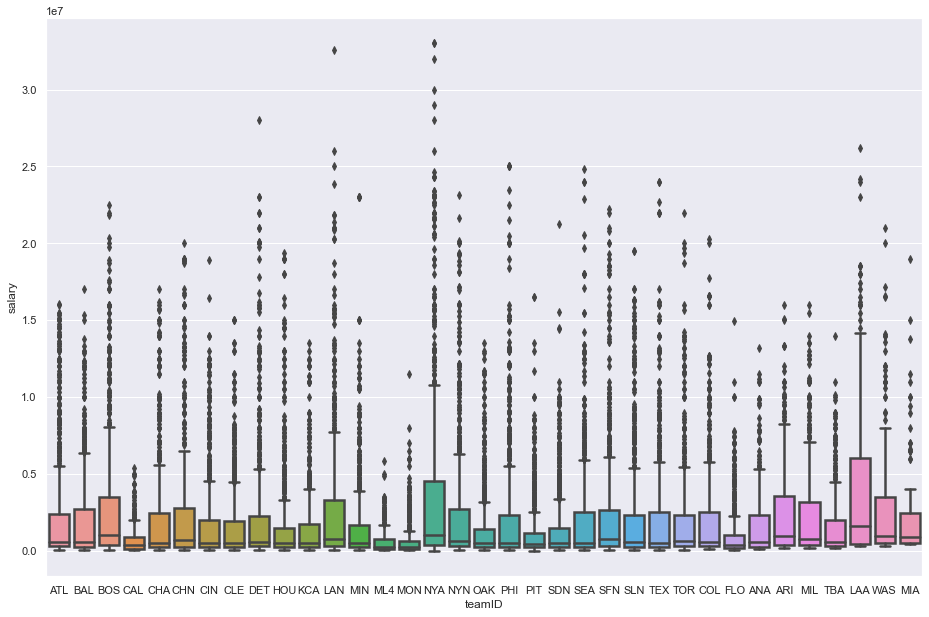

In [73]:
sns.boxplot(x=df['teamID'], y = df['salary'],linewidth=2.5)


(c) Read the offical documentation (https://seaborn.pydata.org/) to understand how lmplot, catplot, relplot, and jointplot works.

### Jupyter Notebook

#### Jupyter Notebook Extensions

Extensions such as the code formatter, table of content is to make your development more efficient. To explore it, please refer to https://github.com/ipython-contrib/jupyter_contrib_nbextensions.

#### Jupyter Visual Debugger

The Pixie Debugger is a visual debugger for debugging on Jupyter Notebook. To explore it, please refer to https://medium.com/codait/the-visual-python-debugger-for-jupyter-notebooks-youve-always-wanted-761713babc62.

### Git and GitHub

1. In the directory that where this jupyter notebook file locates in, init a Git repository.
2. Checkout a new branch called dev and commit the current notebook within this branch.
3. Merge the dev branch to the master branch (the default branch).
4. Create a temporary repository (just for practicing and you can delete it later) in GitHub. 
5. Push new changes in the master branch to the remote repository created in step 4.
6. Checkout the dev branch again and do some changes to your notebook, and then repeat step 3 and step 5.